In [7]:
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np

In [8]:
dataset = ak.from_parquet("~/Developer/Heidelberg/high-dim-unfolding/data/ttbar/particles_merged.parquet")

In [ ]:
# gen_particles = dataset["gen_particles"]
# rec_particles = dataset["rec_particles"]
# rec_constituents = dataset["rec_constituents"]
# gen_jets = dataset["gen_jets"]
# rec_jets = dataset["rec_jets"]
# sd_gen_jets = dataset["sd_gen_jets"][..., [3, 0, 1, 2]]
# sd_rec_jets = dataset["sd_rec_jets"][..., [3, 0, 1, 2]]
gen_particles = dataset["gen"][..., []]
rec_particles = dataset["rec"]

In [10]:
gen_particles.type.show()
rec_particles.type.show()

23596 * var * var * float64
23596 * var * var * float64


In [5]:
def unpack_last(array):
    return array[..., 0], array[..., 1], array[..., 2], array[..., 3]

def jetmomenta_to_fourmomenta(jetmomenta):
    pt, phi, eta, m = unpack_last(jetmomenta)

    px = pt * np.cos(phi)
    py = pt * np.sin(phi)
    pz = pt * np.sinh(eta)
    E = np.sqrt(m**2 + px**2 + py**2 + pz**2)

    fourmomenta = ak.concatenate((E[..., None], px[..., None], py[..., None], pz[..., None]), axis=-1)
    return fourmomenta

def fourmomenta_to_jetmomenta(fourmomenta):
    E, px, py, pz = unpack_last(fourmomenta)
    
    pt = np.sqrt(px**2 + py**2)
    phi = np.arctan2(py, px)
    eta = np.arctanh(pz / E)
    m = np.sqrt(E**2 - px**2 - py**2 - pz**2)
    return ak.concatenate((pt[..., None], phi[..., None], eta[..., None], m[..., None]), axis=-1)

In [11]:
gen_particles = jetmomenta_to_fourmomenta(gen_particles)
rec_particles = jetmomenta_to_fourmomenta(rec_particles)

IndexError: cannot slice ListArray (of length 2395633) with array(3): index out of range while attempting to get index 3 (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-45/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_next_at.cpp#L21)

In [ ]:
sd_gen_jets = fourmomenta_to_jetmomenta(sd_gen_jets)
sd_rec_jets = fourmomenta_to_jetmomenta(sd_rec_jets)

In [ ]:
gen_jets = jetmomenta_to_fourmomenta(gen_jets)
rec_jets = jetmomenta_to_fourmomenta(rec_jets)

In [ ]:
summed_gen_jets = ak.sum(gen_particles,axis=1)
summed_rec_jets = ak.sum(rec_particles,axis=1)

In [ ]:
print("Mean gen jet E:", ak.mean(gen_jets[..., 0]))
print("Mean summed gen jet E:", ak.mean(summed_gen_jets[..., 0]))
print("Mean gen jet px:", ak.mean(gen_jets[..., 3]))
print("Mean summed gen jet px:", ak.mean(summed_gen_jets[..., 3]))
print("Mean gen jet py:", ak.mean(gen_jets[..., 1]))
print("Mean summed gen jet py:", ak.mean(summed_gen_jets[..., 1]))
print("Mean gen jet pz:", ak.mean(gen_jets[..., 2]))
print("Mean summed gen jet pz:", ak.mean(summed_gen_jets[..., 2]))

print("Mean rec jet E:", ak.mean(rec_jets[..., 0]))
print("Mean summed rec jet E:", ak.mean(summed_rec_jets[..., 0]))
print("Mean rec jet px:", ak.mean(rec_jets[..., 3]))
print("Mean summed rec jet px:", ak.mean(summed_rec_jets[..., 3]))
print("Mean rec jet py:", ak.mean(rec_jets[..., 1]))
print("Mean summed rec jet py:", ak.mean(summed_rec_jets[..., 1]))
print("Mean rec jet pz:", ak.mean(rec_jets[..., 2]))
print("Mean summed rec jet pz:", ak.mean(summed_rec_jets[..., 2]))

Mean gen jet E: 800.9472382372549
Mean summed gen jet E: 800.9472370442382
Mean gen jet px: -7.6287704647565615
Mean summed gen jet px: -7.628770919545182
Mean gen jet py: 5.9126299198972685
Mean summed gen jet py: 5.912629611213637
Mean gen jet pz: 5.66146496713377
Mean summed gen jet pz: 5.661464807427769
Mean rec jet E: 783.8619340656779
Mean summed rec jet E: 868.8444695517313
Mean rec jet px: -7.275188303040677
Mean summed rec jet px: -6.9136815988682985
Mean rec jet py: 5.919779793642706
Mean summed rec jet py: 5.935554871066358
Mean rec jet pz: 4.948464657784084
Mean summed rec jet pz: 5.992157019538712


In [ ]:
summed_gen_jets = ak.to_numpy(fourmomenta_to_jetmomenta(summed_gen_jets))
summed_rec_jets = ak.to_numpy(fourmomenta_to_jetmomenta(summed_rec_jets))

In [ ]:
print(np.median(gen_jets[..., 3]), np.median(rec_jets[..., 3]))
print(np.median(sd_gen_jets[..., 3]), np.median(sd_rec_jets[..., 3]))
print(np.median(summed_gen_jets[..., 3]), np.median(summed_rec_jets[..., 3]))

194.98761749267578 186.48320770263672
177.36350713333195 172.3612758414334
194.98761572278414 197.4016681942765


In [ ]:
print(np.median(gen_jets[..., 0]), np.median(rec_jets[..., 2]))
print(np.median(sd_gen_jets[..., 0]), np.median(sd_rec_jets[..., 2]))
print(np.median(summed_gen_jets[..., 0]), np.median(summed_rec_jets[..., 2]))

473.9623260498047 -0.04043453373014927
462.00969406040133 -0.04095862726127525
473.96233739577565 -0.03445820024759826


Text(0, 0.5, 'Number of jets')

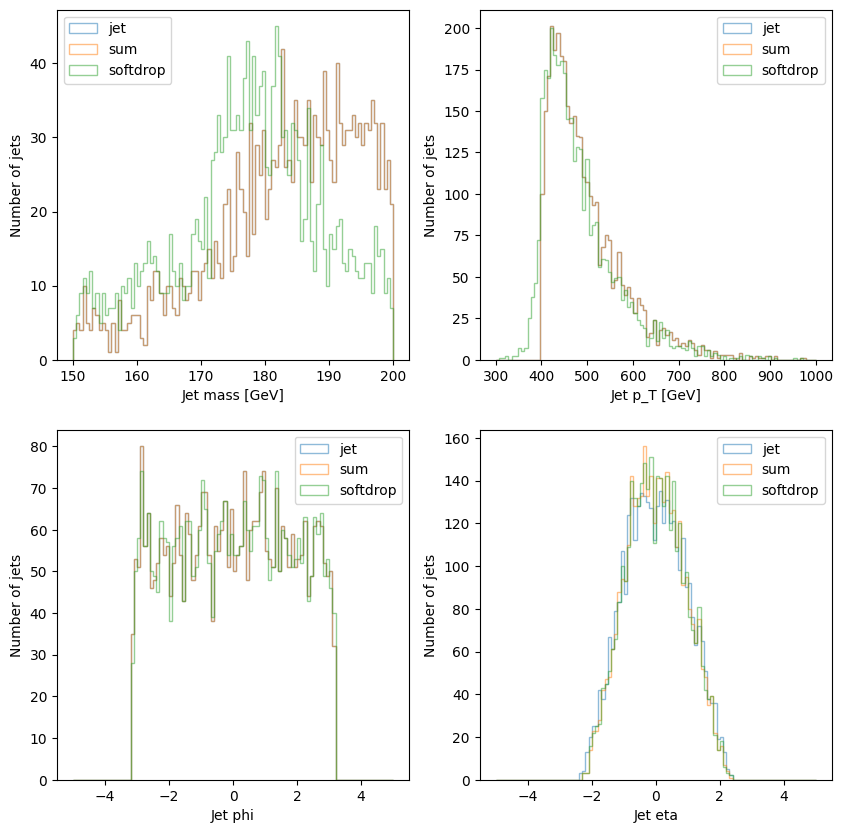

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(10, 10))
ax[0, 0].hist(gen_jets[:,3], bins=100, range=(150, 200), alpha=0.5, label="jet", histtype='step')
ax[0, 0].hist(summed_gen_jets[:,3], bins=100, range=(150, 200), alpha=0.5, label="sum", histtype='step')
ax[0, 0].hist(sd_gen_jets[:,3], bins=100, range=(150, 200), alpha=0.5, label="softdrop", histtype='step')
ax[0, 0].legend()
ax[0, 0].set_xlabel("Jet mass [GeV]")
ax[0, 0].set_ylabel("Number of jets")
ax[0, 1].hist(gen_jets[:,0], bins=100, range=(300, 1000), alpha=0.5, label="jet", histtype='step')
ax[0, 1].hist(summed_gen_jets[:,0], bins=100, range=(300, 1000), alpha=0.5, label="sum", histtype='step')
ax[0, 1].hist(sd_gen_jets[:,0], bins=100, range=(300, 1000), alpha=0.5, label="softdrop", histtype='step')
ax[0, 1].legend()
ax[0, 1].set_xlabel("Jet p_T [GeV]")
ax[0, 1].set_ylabel("Number of jets")
ax[1, 0].hist(gen_jets[:,1], bins=100, range=(-5, 5), alpha=0.5, label="jet", histtype='step')
ax[1, 0].hist(summed_gen_jets[:,1], bins=100, range=(-5, 5), alpha=0.5, label="sum", histtype='step')
ax[1, 0].hist(sd_gen_jets[:,1], bins=100, range=(-5, 5), alpha=0.5, label="softdrop", histtype='step')
ax[1, 0].legend()
ax[1, 0].set_xlabel("Jet phi")
ax[1, 0].set_ylabel("Number of jets")
ax[1, 1].hist(gen_jets[:,2], bins=100, range=(-5, 5), alpha=0.5, label="jet", histtype='step')
ax[1, 1].hist(summed_gen_jets[:,2], bins=100, range=(-5, 5), alpha=0.5, label="sum", histtype='step')
ax[1, 1].hist(sd_gen_jets[:,2], bins=100, range=(-5, 5), alpha=0.5, label="softdrop", histtype='step')
ax[1, 1].legend()
ax[1, 1].set_xlabel("Jet eta")
ax[1, 1].set_ylabel("Number of jets")